<h1 align="center">Solución numérica de la ecuación de Schrödinger 1D invariante en el tiempo por el método del disparo</h1>
<div align="right">David A. Miranda, PhD<br>2022</div>

## 1. Cargar librerías

In [65]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as ct
from scipy.optimize import newton

## 2. Planteamiento del problema

Sea un electrón confinado en un pozo de potencial formado por $4 nm$ de GaAs rodeado de $Al_{0.3}Ga_{0.7}As$

$$E_c = \frac{\hbar^2}{2m^* \delta^2}$$
$$m^* = m_{eff} m_e$$

In [88]:
dpi = 120
m_eff = 0.5
δ = 0.5e-10 # m
Ec = ct.Planck**2 / ( 2 * m_eff * ct.m_e * δ**2) / ct.elementary_charge # [eV]

In [113]:
def wavefunction(x, E, U, ψ0=0, ψ1=1):
    F = (U - E)/Ec + 2
    ψ = np.zeros(len(x))
    ψ[0] = ψ0
    ψ[1] = ψ1
    for n in range(2,len(x)):
        ψ[n] = F[n-1] * ψ[n-1] - ψ[n-2]
    return ψ

In [145]:
def potential_energy(x, a=4, Umax=4):
    U = np.zeros(len(x))
    U[np.abs(x) > a] = Umax
    return U

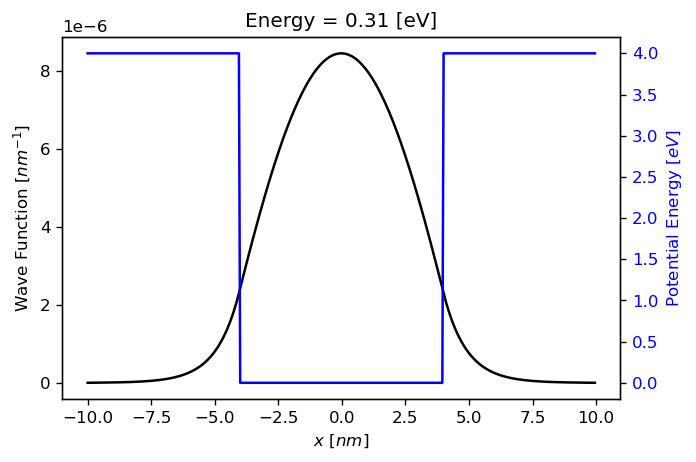

In [146]:
x = np.arange(-10, 10, 1e9*δ)
U = potential_energy(x, a=4)

def obj_funct(E, x=x, ψ0=0, ψ1=1):
    ψ =  wavefunction(x, E, U, ψ0=0, ψ1=1)
    return ψ[-1]

Eo = 0 # eV
E = newton(obj_funct, Eo)
ψ = wavefunction(x, E, U, ψ0=0, ψ1=1)
int_ψ2 = np.trapz(np.abs(ψ)**2, x=x)
ψ /= int_ψ2   

fig,ax = plt.subplots(dpi=dpi)
ax.plot(x, ψ, color='k')
ax.set_xlabel(r'$x\,\,[nm]$')
ax.set_ylabel(r'Wave Function $[nm^{-1}]$', color='k')
ax2 = ax.twinx()
ax2.plot(x, U, color='b')
ax2.set_ylabel('Potential Energy $[eV]$', color='b') 
ax2.tick_params(axis='y', labelcolor='b')
_ = plt.title('Energy = %0.2f [eV]' % (E))